### Solutions for Problem Set #1

This notebook is in html. To be able to run it, please click: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gunerilhan/economicgrowth/blob/master/ps1/ps1.ipynb)

First import some of the package we will use in this exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('https://gunerilhan.github.io/img/fivethirtyeight-modified.mplstyle')

Consider the Solow model. Suppose the production function is $Y=K^\alpha(ehL)^{1-\alpha}$

-  Convert the above production function (for aggregate output) into a per-worker production function, $y=f(k)$. i.e. clearly specify the functional form of $f(k)$.
-  Write down the formula for the change in capital per worker, $\dot{k}$ , as a function of capital per worker, $k$, and other exogenous variables in the model.
-  Suppose that investment rate is 20%, $\gamma=0.2$, depreciation rate is 5%, $\delta=0.05$, population growth rate is 1%, $n = 0.01$, $e = 1$, $h = 1$, and $\alpha=0.33.$

1. Calculate the investment per worker in the economy for each of the following capital per worker levels: $k = 5.6, 5.7, 5.8, 5.9, 6, 6.03, 6.1, 6.2, 6.3$ (**10% of the quiz mark**)
2. Calculate the capital per worker dilution, $(\delta+n)k$, for each of the capital per worker levels listed in part 1. (**10% of the quiz mark**)
3. Using the values you found in part 1 and 2, plot a Solow diagram. For each of the capital per worker levels listed in part 1, calculate the change in capital per worker, $\dot{k}$. (**10% of the quiz mark**)
4. Find the steady-state capital per worker in the economy.  (**10% of the quiz mark**)
5. Suppose that currently the employment to population ratio is 65%. What is the steady-state capital per capita in the economy? What is the steady state output per capita in the economy?  (**10% of the quiz mark**)
6. Suppose that the employment to population ratio rose to 75% suddenly and permanently.[^1]In other words, instead of 65% of population working, now 75% of the population are working. Repeat part 1, 2, and 3 after the event.  (**15% of the quiz mark**)
7. Starting from the steady state you found on part 5[^2], simulate the economy for 100 periods after the event, i.e calculate the path of capital per worker, output per worker and output per capita for 100 periods after the event. Plot your results.  (**30% of the quiz mark**)[^3]

[^1]: This event does not alter the population growth rate, which is still equal to 1%.

[^2]: Consider that the economy was at the steady state with 65% employment to population ratio at time $t=0.$ Before period $t=1,$ the employment to population ratio rose to 75%. Your goal is to find the path of capital per worker, output per worker, and output per capita at each time $t=0,1,...,100.$

[^3]: The remaining 5% of your quiz mark will be awarded to the proper submission of your workings on the problem set.



Divide both left and right hand side with $L$

$$\frac{Y}{L} = \frac{K^\alpha (ehL)^{1-\alpha}}{L} = \frac{K^\alpha (ehL)^{1-\alpha}}{L^\alpha L^{1-\alpha}} = \left(\frac{K}{L}\right)^\alpha \left(\frac{ehL}{L}\right)^{1-\alpha}$$
$$f(k) = k^\alpha (eh)^{1-\alpha}$$

In [2]:
# Assign parameter values
alpha = 0.33
gamma = 0.2
delta = 0.05
n = 0.01
e = 1
h = 1
# sequence of capital per worker and output per worker to be filled later.
k_seq  = np.array([5.6,5.7,5.8,5.9,6,6.03,6.1,6.2,6.3])

$\dot{k}=\gamma k_t^\alpha (eh)^{1-\alpha} - (n + \delta)k$,
where invesment per worker $= \gamma k_t^\alpha (eh)^{1-\alpha}$


In [3]:
# investment per worker
i_seq = gamma*k_seq**alpha*(e*h)**(1-alpha)
# capital dilution per worker
d_seq = (n+delta)*k_seq
# change in capital per worker
k_dot = i_seq - d_seq

In [4]:
pd.DataFrame(data={'Capital per worker':k_seq,
                   'Investment per worker':i_seq,
                  'Capital depreciation + dilution per worker':d_seq,
                  'Change in capital per worker':k_dot}).round(decimals=3)

,Capital per worker,Investment per worker,Capital depreciation + dilution per worker,Change in capital per worker
0,5.60,0.353,0.336,0.017
1,5.70,0.355,0.342,0.013
2,5.80,0.357,0.348,0.009
3,5.90,0.359,0.354,0.005
4,6.00,0.361,0.360,0.001
5,6.03,0.362,0.362,0.000
6,6.10,0.363,0.366,-0.003
7,6.20,0.365,0.372,-0.007
8,6.30,0.367,0.378,-0.011


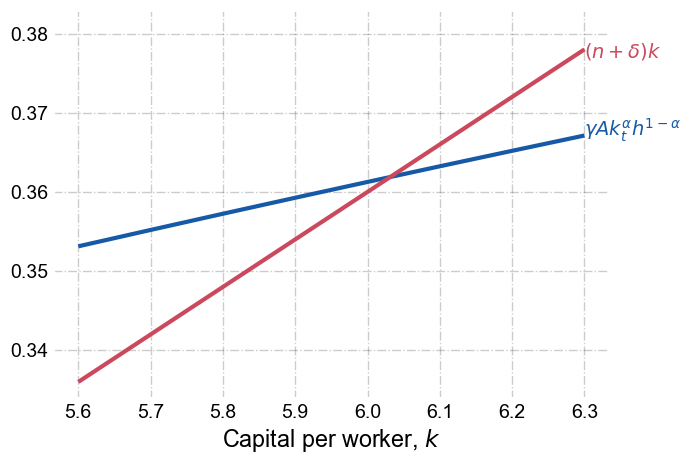

In [5]:
p=plt.plot(k_seq,i_seq)
plt.annotate(r'$\gamma Ak_t^\alpha h^{1-\alpha}$',(6.3,0.367),color=p[0].get_color())
p=plt.plot(k_seq,d_seq)
plt.annotate(r'$(n + \delta)k$',(6.3,0.377),color=p[0].get_color())
plt.xlabel('Capital per worker, $k$')
plt.ylim(ymax=0.383);

Text(0, 0.5, '$\\dot{k}$')

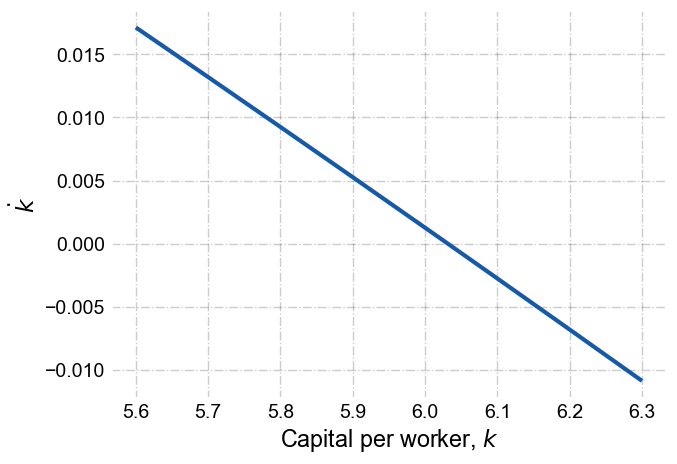

In [6]:
plt.plot(k_seq,k_dot)
plt.xlabel('Capital per worker, $k$')
plt.ylabel('$\dot{k}$')

At the steady state, $\dot{k}=0$, and consequently $\gamma {k^\ast}^\alpha (eh)^{1-\alpha}=(\delta+n){k^\ast}$, yielding

$${k^\ast}=\left( \frac{\gamma }{\delta + n}\right)^{1/(1-\alpha)}eh$$


In [7]:
k_ss = (gamma/(delta+n))**(1/(1-alpha))*e*h

In [8]:
print('Steady state capital per worker = ',np.round(k_ss,decimals=3))

Steady state capital per worker =  6.031


Capital per capita is equal to capital per worker $\times$ employment to population ratio. 

In [9]:
epop = 0.65
k_c = k_ss*epop
y_ss = k_ss**alpha*(e*h)**(1-alpha)
y_c = y_ss*epop
print('Steady state capital per capita = ',np.round(k_c,decimals=3))
print('Steady state output per capita = ',np.round(y_c,decimals=3))


Steady state capital per capita =  3.92
Steady state output per capita =  1.176


In [10]:
epop_new = 0.75
T = 100
k_seq = np.zeros(T+10)
t_seq = np.arange(-9,T+1)
k_seq[:10]=k_ss
k_seq[10]=k_ss*epop/epop_new
for t in range(10,T+9):
    kdot = gamma*k_seq[t]**alpha*(e*h)**(1-alpha)-(delta+n)*k_seq[t]
    k_seq[t+1]=k_seq[t]+kdot

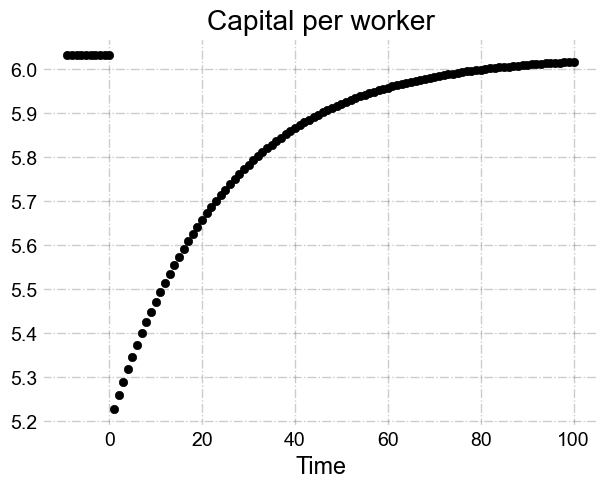

In [11]:
plt.scatter(t_seq,k_seq,color='k')
plt.xlabel('Time');
plt.title('Capital per worker');

In [12]:
y_seq = k_seq**alpha*(e*h)**(1-alpha)

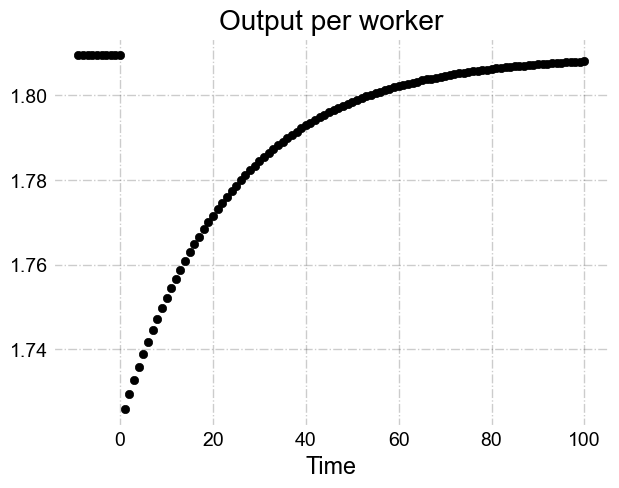

In [13]:
plt.scatter(t_seq,y_seq,color='k')
plt.xlabel('Time');
plt.title('Output per worker');

In [14]:
y_c_seq = y_seq*epop_new
y_c_seq[:10]=y_seq[:10]*epop

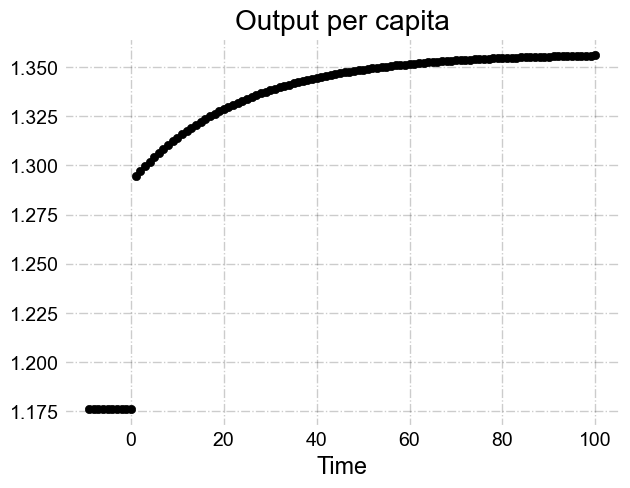

In [15]:
plt.scatter(t_seq,y_c_seq,color='k')
plt.xlabel('Time');
plt.title('Output per capita');

In [16]:
df=pd.DataFrame({'Time':t_seq,'Capital per worker':k_seq,'Output per worker':y_seq,'Output per capita':y_c_seq})

In [17]:
df.set_index('Time',inplace=True)

In [18]:
df.round(decimals=3)

,Capital per worker,Output per worker,Output per capita
Time,,,
-9,6.031,1.809,1.176
-8,6.031,1.809,1.176
-7,6.031,1.809,1.176
-6,6.031,1.809,1.176
-5,6.031,1.809,1.176
...,...,...,...
96,6.015,1.808,1.356
97,6.015,1.808,1.356
98,6.016,1.808,1.356
